<a href="https://colab.research.google.com/github/sranifp/PBA-Sentimen-Analisis-UBER/blob/main/Pre_Processing_UBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Perintah untuk mengaitkan Google Drive Anda
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

file_path_di_drive = '/content/drive/MyDrive/Pengolahan Bahasa Alami/Bu IRMA/Tugas Individu/Data/uber_reviews_raw.csv'

try:
    df_uber = pd.read_csv(file_path_di_drive)

    print("✅ DataFrame df_uber berhasil dimuat!")
    print("\nInformasi Kolom:")
    print(df_uber.info())
    print("\n5 Baris Pertama:")
    print(df_uber.head())

except FileNotFoundError:
    print(f"❌ ERROR: File tidak ditemukan di jalur: {file_path_di_drive}")
    print("Pastikan Anda sudah menjalankan langkah Mount Drive dan jalur file sudah benar.")

✅ DataFrame df_uber berhasil dimuat!

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790475 entries, 0 to 1790474
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   reviewId              object
 1   userName              object
 2   userImage             object
 3   content               object
 4   score                 int64 
 5   thumbsUpCount         int64 
 6   reviewCreatedVersion  object
 7   at                    object
 8   replyContent          object
 9   repliedAt             object
 10  appVersion            object
dtypes: int64(2), object(9)
memory usage: 150.3+ MB
None

5 Baris Pertama:
                               reviewId       userName  \
0  76b3d3f6-6491-4539-853a-b9c69a0ea5b2  A Google user   
1  ba4c1c17-dcb9-48dd-95a8-b59ebbdaa23b  A Google user   
2  501420d1-a032-4981-bd64-fb948333bd2f  A Google user   
3  5dc1a519-a151-4c46-88df-7aae80f24a3d  A Google user   
4  d7f3ebd3-6e4a-41a0-8f8

# Pre-Processing

**Lowercasing**

In [4]:
# 1. Pastikan kolom 'content' bertipe string, untuk menghindari error pada nilai non-teks
df_uber['content'] = df_uber['content'].astype(str)

print("--- Sebelum Lowercasing ---")
# Menampilkan contoh data sebelum di-lowercase
# (Menggunakan indeks 188, 1, dan 3831 sebagai contoh, seperti yang teman Anda lakukan)
print(f"Index 188: {df_uber['content'][188]}")
print(f"Index 1: {df_uber['content'][1]}")
print(f"Index 3831: {df_uber['content'][3831]}")


# 2. Lowercase (Case Folding) semua ulasan
df_uber['content'] = df_uber['content'].apply(lambda x: x.lower())

print("\n--- Setelah Lowercasing ---")
# Menampilkan contoh data setelah di-lowercase
print(f"Index 188: {df_uber['content'][188]}")
print(f"Index 1: {df_uber['content'][1]}")
print(f"Index 3831: {df_uber['content'][3831]}")

--- Sebelum Lowercasing ---
Index 188: worked very well very easy. Chris was on time
Index 1: good
Index 3831: fast friendly and firm

--- Setelah Lowercasing ---
Index 188: worked very well very easy. chris was on time
Index 1: good
Index 3831: fast friendly and firm


Remove Punctuations

In [5]:
import re
import string
import pandas as pd

# Fungsi untuk menghapus tanda baca
def remove_punctuation_re(text):
    # Menggantikan semua tanda baca yang ada di string.punctuation dengan string kosong ''
    return re.sub('[%s]' % re.escape(string.punctuation), '', text)

# Terapkan penghapusan tanda baca ke kolom 'content_formal'
df_uber['content_no_punct'] = df_uber['content'].apply(lambda x: remove_punctuation_re(x))

# Tampilkan 5 baris pertama untuk membandingkan hasil
display(df_uber[['content', 'content_no_punct']].head())

,content,content_no_punct
0,👍🙂🙂🙂,👍🙂🙂🙂
1,good,good
2,doliczają dodatkowe opłaty ~10% po zakończonej...,doliczają dodatkowe opłaty 10 po zakończonej u...
3,excellent service,excellent service
4,🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫,🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫


**Remove Emoji**

In [6]:
import re
import pandas as pd

# Regular expression untuk mencocokkan sebagian besar karakter emoji
# Ini adalah regex umum yang bekerja dengan baik di Python
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # Emoticon
        '\U0001F300-\U0001F5FF'  # Simbol & Piktograf
        '\U0001F680-\U0001F6FF'  # Transportasi & Simbol Peta
        '\U0001F700-\U0001F77F'  # Simbol Alkimia
        '\U0001F780-\U0001F7FF'  # Geometrik
        '\U0001F800-\U0001F8FF'  # Simbol Tambahan
        '\U0001F900-\U0001F9FF'  # Tambahan Piktograf
        '\U0001FA00-\U0001FA6F'  # Simbol Catur
        '\U0001FA70-\U0001FAFF'  # Tambahan A
        '\U00002702-\U000027B0'  # Dingbats
        '\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Terapkan penghapusan emoji ke kolom 'content_no_punct'
df_uber['content_no_emoji'] = df_uber['content_no_punct'].apply(lambda x: remove_emoji(x))

# Tampilkan 5 baris pertama untuk membandingkan hasil
display(df_uber[['content_no_punct', 'content_no_emoji']].head())

,content_no_punct,content_no_emoji
0,👍🙂🙂🙂,
1,good,good
2,doliczają dodatkowe opłaty 10 po zakończonej u...,doliczają dodatkowe opłaty 10 po zakończonej u...
3,excellent service,excellent service
4,🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫🤫,


**Tokenization**

In [7]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download 'punkt' (diperlukan untuk word_tokenize)
# Karena ini dijalankan di Colab/notebook, kita bisa menggunakan 'punkt'
nltk.download('punkt')
# Download 'punkt_tab' as suggested by the error message
nltk.download('punkt_tab')


def tokenize_text_nltk(text):
    # Gunakan nltk.word_tokenize untuk memisahkan teks menjadi kata-kata (token)
    return nltk.word_tokenize(text)

# Terapkan NLTK tokenization ke kolom 'content_no_emoji'
# Pastikan kolom bertipe string sebelum apply
df_uber['content_tokens'] = df_uber['content_no_emoji'].astype(str).apply(lambda x: tokenize_text_nltk(x))

# Tampilkan 5 baris pertama untuk membandingkan hasil
display(df_uber[['content_no_emoji', 'content_tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content_no_emoji,content_tokens
0,,[]
1,good,[good]
2,doliczają dodatkowe opłaty 10 po zakończonej u...,"[doliczają, dodatkowe, opłaty, 10, po, zakończ..."
3,excellent service,"[excellent, service]"
4,,[]


**Stopword Removal dan Lemmatization**

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet') # Often needed for Lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:


stop_words_english_nltk = set(stopwords.words('english'))

custom_noise_words = {
    'app', 'uber', 'service', 'driver', 'drivers', 'cab', 'ride', 'auto',
    'customer', 'support', 'good', 'nice', 'best', 'very', 'much', 'thanks',
    'thank', 'plse', 'time', 'min', 'mins', 'minutes', 'amount', 'fare',
    'price', 'day', 'hai', 'aap', 'wala', 'accha', 'kro', 'http', 'usercontent',
    'profile', 'picture', 'android', 'great', 'experience', 'u', 'one', 'even', 'use', 'not', 'no', 'great','get', 'like', 'take', 'need', 'work', 'car',
    'always', 'love', 'book', 'time', 'easy', 'go', 'option', 'also', 'way', 'im', 'better', 'using',
    'really', 'show', 'please', 'ever', 'got', 'help', 'phone', 'first', 'want', 'number', 'give', 'call', 'would', 'make', 'keep', 'still', 'used', 'know', 'u', 'dont', 'cant'
}

temp_stopwords = stop_words_english_nltk.difference(negation_words)
all_stop_words = temp_stopwords.union(custom_noise_words)
lemmatizer = WordNetLemmatizer()


# --- FUNGSI STOPWORD REMOVAL & LEMMATIZATION KUSTOM ---

def remove_stopwords_and_lemmatize_custom(tokens):
    # 1. Stopword Removal: Filter token yang TIDAK ada di set 'all_stop_words'
    tokens_no_stop = [word for word in tokens if word not in all_stop_words]

    # 2. Lemmatization: Terapkan lemmatization pada token yang tersisa
    # Pastikan kata-kata tersebut sudah di-lowercase di tahap sebelumnya
    tokens_final = [lemmatizer.lemmatize(word) for word in tokens_no_stop]

    # Gabungkan kembali menjadi string
    return " ".join(tokens_final)


# --- PENERAPAN PADA DATAFRAME df_uber ---

# Terapkan fungsi di atas ke kolom 'content_tokens'
df_uber['content_final_clean'] = df_uber['content_tokens'].apply(remove_stopwords_and_lemmatize_custom)

# Tampilkan 5 baris pertama untuk membandingkan hasil
display(df_uber[['content_tokens', 'content_final_clean']].head())

,content_tokens,content_final_clean
2,"[doliczają, dodatkowe, opłaty, 10, po, zakończ...",doliczają dodatkowe opłaty 10 po zakończonej u...
3,"[excellent, service]",excellent
5,"[ابلكيشن, تحفة, و, كل, الكباتن, بتاعتة, محترمين]",ابلكيشن تحفة و كل الكباتن بتاعتة محترمين
6,[cool],cool
7,"[app, says, 1, min, waiting, turned, out, wait...",say 1 waiting turned waiting 10 waiting fee ta...


**Hapus Data Kosong**

In [15]:
import pandas as pd
import numpy as np

# --- PENGHAPUSAN BARIS KOSONG SETELAH PEMROZESAN ---

# 1. Pastikan nilai string kosong ('') diubah menjadi NaN agar bisa dideteksi oleh dropna
df_uber['content_final_clean'].replace('', np.nan, inplace=True)

# 2. Hapus baris di mana 'content_final_clean' bernilai NaN
df_uber.dropna(subset=['content_final_clean'], inplace=True)

# 3. Tampilkan informasi baris yang tersisa
print(f"Jumlah baris setelah menghapus baris kosong: {len(df_uber)}")
print("\n5 Baris Pertama setelah pembersihan final:")
display(df_uber[['content_tokens', 'content_final_clean']].head())

/tmp/ipython-input-3141046881.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_uber['content_final_clean'].replace('', np.nan, inplace=True)


Jumlah baris setelah menghapus baris kosong: 1368102

5 Baris Pertama setelah pembersihan final:


,content_tokens,content_final_clean
2,"[doliczają, dodatkowe, opłaty, 10, po, zakończ...",doliczają dodatkowe opłaty 10 po zakończonej u...
3,"[excellent, service]",excellent
5,"[ابلكيشن, تحفة, و, كل, الكباتن, بتاعتة, محترمين]",ابلكيشن تحفة و كل الكباتن بتاعتة محترمين
6,[cool],cool
7,"[app, says, 1, min, waiting, turned, out, wait...",say 1 waiting turned waiting 10 waiting fee ta...


**Frequency Analysis**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist
import pandas as pd
import numpy as np

/tmp/ipython-input-3223217078.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df_freq, palette='viridis')


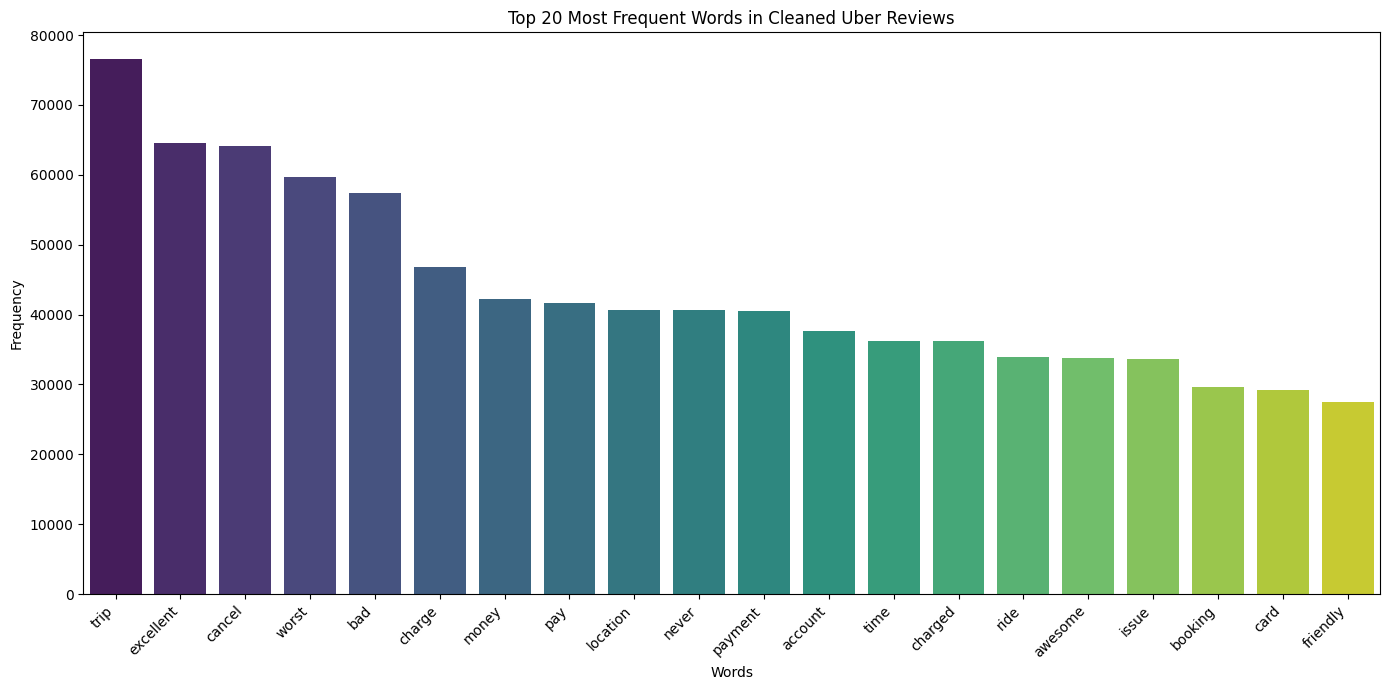


✅ DataFrame Frekuensi Kata Teratas:
         Word  Frequency
0        trip      76560
1   excellent      64492
2      cancel      64186
3       worst      59698
4         bad      57443
5      charge      46825
6       money      42190
7         pay      41628
8    location      40638
9       never      40604
10    payment      40527
11    account      37583
12       time      36257
13    charged      36245
14       ride      33955
15    awesome      33746
16      issue      33572
17    booking      29697
18       card      29236
19   friendly      27438


In [30]:
# Pastikan matplotlib dan seaborn sudah terinstal (di Colab biasanya sudah terinstal)

# 1. Menggabungkan semua teks bersih menjadi satu string besar
all_words = ' '.join(df_uber['content_final_clean'])

# 2. Tokenize string besar tersebut menjadi list kata-kata
# Kita pisahkan berdasarkan spasi karena 'content_final_clean' berbentuk string
words_list = all_words.split()

# 3. Hitung frekuensi setiap kata menggunakan FreqDist NLTK
fdist = FreqDist(words_list)

# 4. Ambil 20 kata yang paling sering muncul
top_20_words = fdist.most_common(20)

# 5. Konversi ke DataFrame untuk visualisasi
df_freq = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])


# --- VISUALISASI GRAFIK BATANG ---

plt.figure(figsize=(14, 7))
# Gunakan Seaborn untuk tampilan grafik batang yang lebih baik
sns.barplot(x='Word', y='Frequency', data=df_freq, palette='viridis')

plt.title('Top 20 Most Frequent Words in Cleaned Uber Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Putar label x agar mudah dibaca
plt.tight_layout() # Sesuaikan layout agar semua label terlihat
plt.show()

print("\n✅ DataFrame Frekuensi Kata Teratas:")
print(df_freq)

**Download Hasil Preprocessing**

In [31]:
import pandas as pd
from google.colab import files

filename = 'uber_reviews_clean.csv'

df_uber.to_csv(filename, index=False)

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>